# リカレントニューラルネットワーク

全結合ネットワークや畳込みニューラルネットワークは、記憶を持たない。
これらのネットワークに渡される入力はそれぞれ個別に処理され、入力にまたがって維持されることはない。
そうしたネットワークでシーケンスや時系列データを処理するには、シーケンス全体を一度にネットワークへ提供し、単一のデータ点として扱われるようにする必要がある。こうしたネットワークはフィードフォワードネットワークと呼ばれる。

対照的に、生物知能は情報を斬新的に処理しながら、処理しているものの内部モデルを維持する。このモデルは過去の情報から構築され、新しい情報が与えられるたびに更新される。
リカレントニューラルネットワークも非常に単純化されてはいるものの、同様の原理である。
この場合、シーケンスの処理はシーケンスの要素を反復的に処理する方法で行われる。

In [1]:
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500 
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 14s 712us/step - loss: 0.6411 - acc: 0.6148 - val_loss: 0.5589 - val_acc: 0.7130
Epoch 2/10
20000/20000 [==============================] - 13s 674us/step - loss: 0.4103 - acc: 0.8237 - val_loss: 0.4848 - val_acc: 0.7650
Epoch 3/10
20000/20000 [==============================] - 14s 702us/step - loss: 0.3050 - acc: 0.8753 - val_loss: 0.4709 - val_acc: 0.7764
Epoch 4/10
20000/20000 [==============================] - 14s 696us/step - loss: 0.2330 - acc: 0.9116 - val_loss: 0.3885 - val_acc: 0.8372
Epoch 5/10
20000/20000 [==============================] - 14s 699us/step - loss: 0.1610 - acc: 0.9409 - val_loss: 0.3742 - val_acc: 0.8662
Epoch 6/10
20000/20000 [==============================] - 15s 726us/step - loss: 0.1009 - acc: 0.9662 - val_loss: 0.3901 - val_acc: 0.8614
Epoch 7/10
20000/20000 [==============================] - 15s 725us/step - loss: 0.0650 - acc: 0.9799 - val_loss: 0.4

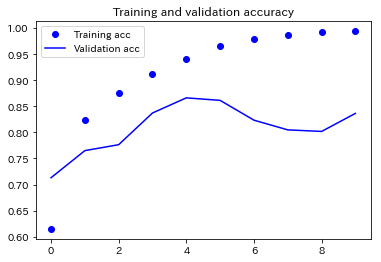

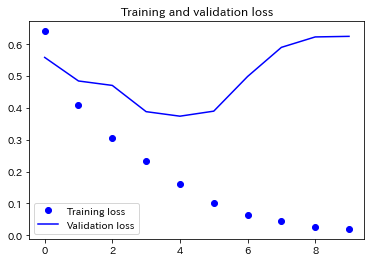

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.5084 - acc: 0.7626 - val_loss: 0.3871 - val_acc: 0.8398
Epoch 2/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.2883 - acc: 0.8871 - val_loss: 0.3602 - val_acc: 0.8392
Epoch 3/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.2309 - acc: 0.9125 - val_loss: 0.2872 - val_acc: 0.8962
Epoch 4/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.2081 - acc: 0.9258 - val_loss: 0.4254 - val_acc: 0.8596
Epoch 5/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1731 - acc: 0.9385 - val_loss: 0.3193 - val_acc: 0.8794
Epoch 6/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.1557 - acc: 0.9444 - val_loss: 0.2969 - val_acc: 0.8784
Epoch 7/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.1368 - acc: 0.9522 - val_loss: 0.3637 - val_acc:

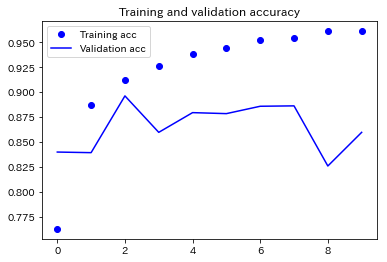

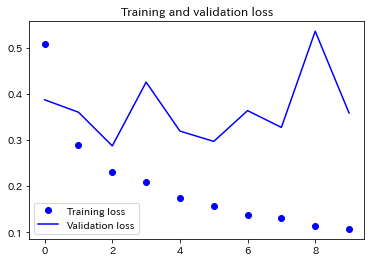

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()